# Telco Customer Churn 

Download data from - https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 

In [2]:
df_raw = pd.read_csv('data/video18/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Firstly Customer ID is continous data - not needed! 
df = df_raw.drop(columns=["customerID"])

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
for column in df.columns:
    print (f"{column} : {df[column].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [7]:
# total charges seems to be non-numeric; convert this to numeric 
df[pd.to_numeric(df["TotalCharges"],errors="coerce").isnull()].shape

(11, 20)

In [8]:
# covert these to numeric values 
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce")

In [9]:
# get rid of these values
df = df[~df["TotalCharges"].isnull()]

In [10]:
df["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

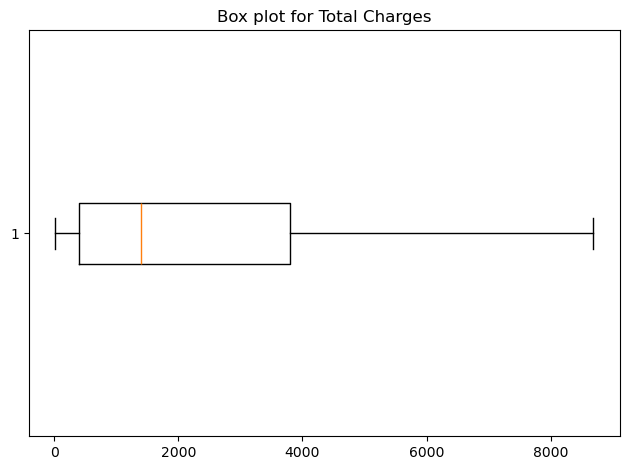

In [11]:
# create a boxplot
plt.boxplot(df["TotalCharges"], vert=False)
plt.title("Box plot for Total Charges")
plt.tight_layout()

In [12]:
for column in df.columns:
    print (f"{column} : {df[column].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

Text(0.5, 1.0, 'Data Distribution for Churned Customer against tenure')

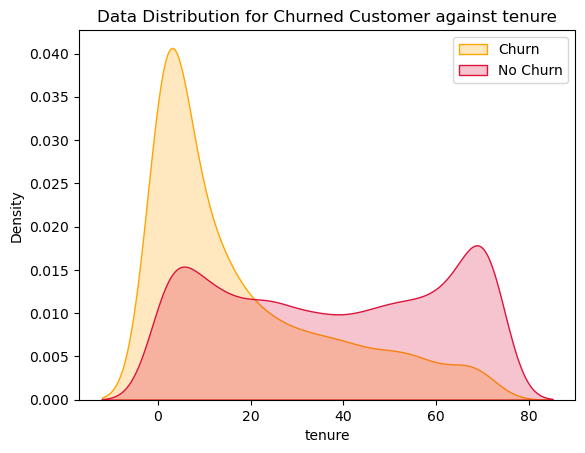

In [13]:
# lets check the data distribution for tenure; long tenured people are less like to move out 
df_tenure_churn = df[df["Churn"] == "Yes"]["tenure"]
df_tenure_no_churn = df[df["Churn"] == "No"]["tenure"]

import seaborn as sns
ax = sns.kdeplot(df_tenure_churn, fill=True, color="orange", label="Churn")
ax = sns.kdeplot(df_tenure_no_churn, fill=True, color="crimson", label="No Churn")
plt.legend()
plt.title("Data Distribution for Churned Customer against tenure")

In [14]:
# check for non numeric coulmns 
def show_unique_values(data_type = "all", df=df):

    if data_type == "object": 
        for column in df.columns:
            if df[column].dtype == "object":
                print (f"{column} : {df[column].unique()}")
    else: 
        for column in df.columns:
            print (f"{column} : {df[column].unique()}")

In [15]:
# Lets convert No internet service to No 
df.replace("No internet service", "No", inplace=True)


In [16]:
# similar convert No phone service to No 
df.replace("No phone service", "No", inplace=True)

In [17]:
show_unique_values("object")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
# convert yes/no columns to binary values 
yes_no_columns = [
    "Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
    "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"
]

for col in yes_no_columns:
    df[col].replace({'Yes' : 1, 'No' : 0}, inplace=True)

/var/folders/kx/s0nzgxq96zgdm61_51783vnm0000gn/T/ipykernel_79616/3941642483.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'Yes' : 1, 'No' : 0}, inplace=True)
/var/folders/kx/s0nzgxq96zgdm61_51783vnm0000gn/T/ipykernel_79616/3941642483.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', 

In [19]:
show_unique_values("all")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [20]:
# replace the gender as well 
df["gender"].replace({"Male" : 1, "Female": 0}, inplace=True)

/var/folders/kx/s0nzgxq96zgdm61_51783vnm0000gn/T/ipykernel_79616/2464575622.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["gender"].replace({"Male" : 1, "Female": 0}, inplace=True)
/var/folders/kx/s0nzgxq96zgdm61_51783vnm0000gn/T/ipykernel_79616/2464575622.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downc

In [21]:
show_unique_values("all")

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [22]:
# perform one hot encoding for InternetService, Contract, PaymentMethod columns 
one_hot_columns = ["InternetService", "Contract", "PaymentMethod"]
df_scaled = pd.get_dummies(data=df, columns=one_hot_columns)
df_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [23]:
show_unique_values("all", df_scaled)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [ True False]
InternetService_Fiber optic : [False  True]
InternetService_No : [False  True]
Contract_Month-to-month : [ True False]
Contract_One year : [False  True]
Contract_Two year : [False  True]
PaymentMethod_Bank transfer (automatic) : [False  True]
PaymentMethod_Credit card (automatic) : [False  True]
PaymentMethod_Electroni

In [24]:
# perform scaling of numeric data - tenure, MonthlyCharges, TotalCharges
numeric_columns = ["tenure", "MonthlyCharges", "TotalCharges"]

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

df_scaled[numeric_columns] = min_max_scaler.fit_transform(df_scaled[numeric_columns])
df_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,0.464789,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,0.014085,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,0.619718,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,0.014085,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


```
Build Model

In [25]:
show_unique_values("all", df_scaled)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [26]:
X = df_scaled.drop("Churn", axis=1)
y = df_scaled["Churn"]

In [27]:
# split test and traning set 
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [28]:
X_train_full.shape, X_test.shape

((5625, 26), (1407, 26))

In [29]:
from tensorflow import keras 
import tensorflow as tf 

In [30]:
X_train_full.shape

(5625, 26)

In [31]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(26,)))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"])

2025-06-19 23:57:45.050018: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-06-19 23:57:45.050049: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-19 23:57:45.050056: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1750357665.050068 4114955 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1750357665.050090 4114955 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [33]:
import time 
import os 

def get_run_logdir(root_logdir="tensorboard_logs", name=""):
    run_id = time.strftime(f"{name}_%Y%m%d%H%M%S")
    return os.path.join(root_logdir, run_id)

In [34]:
# create checkpoints 
FILE_NAME = f"output/video18/telco_customer_churn.keras"
log_dir = get_run_logdir(name="telco_churn")

# create checkpoints - one to save the best model and another one with early stopping 
early_stopping_chkp = keras.callbacks.EarlyStopping(patience=10,
                                                    restore_best_weights=True)

best_estimator_chkp = keras.callbacks.ModelCheckpoint(FILE_NAME, save_best_only=True)

# create checkpoint for tensorboard 
tensorboard_chkp = keras.callbacks.TensorBoard(log_dir, histogram_freq=1, write_graph=True)

In [35]:
X_train, X_val, y_train, y_val = X_train_full[500:], X_train_full[:500], y_train_full[500:], y_train_full[:500]

In [36]:
model.fit(X_train, y_train, epochs=50, callbacks=[early_stopping_chkp, best_estimator_chkp, tensorboard_chkp], validation_data=(X_val, y_val), verbose=1)

Epoch 1/50


2025-06-19 23:57:46.085210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


161/161 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6847 - loss: 0.5973 - val_accuracy: 0.7520 - val_loss: 0.5115
Epoch 2/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7573 - loss: 0.5078 - val_accuracy: 0.7840 - val_loss: 0.4821
Epoch 3/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7756 - loss: 0.4803 - val_accuracy: 0.7980 - val_loss: 0.4655
Epoch 4/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7830 - loss: 0.4627 - val_accuracy: 0.8060 - val_loss: 0.4560
Epoch 5/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7887 - loss: 0.4510 - val_accuracy: 0.8020 - val_loss: 0.4498
Epoch 6/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7941 - loss: 0.4424 - val_accuracy: 0.7980 - val_loss: 0.4457
Epoch 7/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7948 - loss: 0.4360 - val_accuracy: 0.8000 - val_loss: 0.4427
Epoch 8/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7955 - loss: 0.4310 - val_accuracy: 0.8000 - val

In [37]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7920 - loss: 0.4355


[0.4437219500541687, 0.7903340458869934]

In [38]:
y_pred = model.predict(X_test, verbose=1, callbacks=[tensorboard_chkp])

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [39]:
y_pred

array([[0.17645264],
       [0.3190518 ],
       [0.01511416],
       ...,
       [0.7313223 ],
       [0.68286276],
       [0.46822566]], dtype=float32)

In [40]:
# create a function that returns 1 if greater than 0.5 else 0 
y_values = [0 if i[0] < 0.5 else 1 for i in y_pred]

In [41]:
y_values[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 1, 0]

In [42]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [43]:
# create confusion matrix and classification matrix 
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_values)

In [44]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[870, 129],
       [166, 242]], dtype=int32)>

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_values))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       999
           1       0.65      0.59      0.62       408

    accuracy                           0.79      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.79      0.79      0.79      1407



```
Notice the f1 score for class 1 is very less - customers chruning out. 

In [81]:
df_scaled["Churn"].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

``` 
We can see the data sample taken has 0 for 5162 and 1 for 1869 samples. 


In [82]:
df_class_0 = df_scaled[df_scaled["Churn"] == 0]
df_class_1 = df_scaled[df_scaled["Churn"] == 1]

df_class_0.shape, df_class_1.shape

((5163, 27), (1869, 27))

In [83]:
# create a count variable 
count_class_0, count_class_1 = df["Churn"].value_counts()
count_class_0, count_class_1

(5163, 1869)

### 1. Undersampling of Majority Class Strategy

In [100]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [101]:
# lets get sample of data from class 0 
df_class_0.sample(count_class_1).shape

(1869, 27)

In [102]:
# randomly sample 1869 data from the class 0 dataframe 
df_class_0_under = df_class_0.sample(count_class_1)

# concatenate df_class_0_under and df_class_1 to create final dataframe 
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_test_under.shape

(3738, 27)

In [103]:
# create X and y sets from this dataframe 
X = df_test_under.drop("Churn", axis=1)
y = df_test_under["Churn"]

# create training and testing split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [104]:
X_train.shape, X_test.shape

((2990, 26), (748, 26))

In [105]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.models.Sequential([
        keras.layers.Dense(26, input_dim=26, activation="relu"), 
        keras.layers.Dense(15, activation="relu"), 
        keras.layers.Dense(1, activation="sigmoid")
    ])

    model.compile(loss=loss, optimizer="adam", metrics=["accuracy"])
    
    with tf.device('/CPU:0'):
        if weights == -1:
            model.fit(X_train, y_train, epochs=100)
        else: 
            model.fit(X_train, y_train, epochs=100, class_weight=weights)

    print (model.evaluate(X_test, y_test))

    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)

    print ("Classification Report: \n", classification_report(y_test, y_pred))
    
    return y_pred

In [106]:
X_train.shape

(2990, 26)

In [107]:
y_pred_under = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100


/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6262 - loss: 0.6501
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7518 - loss: 0.5168
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7616 - loss: 0.4938
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7632 - loss: 0.4883
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7626 - loss: 0.4853
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7622 - loss: 0.4830
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7663 - loss: 0.4809
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7639 - loss: 0.4791
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7653 - loss: 0.4779
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7648 - loss: 0.4766
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7673 - loss: 0.4753
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7669 - lo

### 2. Oversampling of Minority class

In [108]:
count_class_0, count_class_1

(5163, 1869)

In [117]:
df_class_0.shape, df_class_1.shape

((5163, 27), (1869, 27))

In [109]:
# if we call sample method with replace=True - it will create random samples for me (duplicated data to meet the count)
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over.shape

(5163, 27)

In [110]:
# concatenate both the dataset 
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over.shape

(10326, 27)

In [111]:
df_test_over["Churn"].value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

``` 
Create train test split 

In [112]:
# create X and y sets from this dataframe 
X = df_test_under.drop("Churn", axis=1)
y = df_test_under["Churn"]

# create training and testing split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [113]:
X_train.shape, X_test.shape

((2990, 26), (748, 26))

In [115]:
# train the model 
y_pred_over = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100


/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6010 - loss: 0.6520
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7531 - loss: 0.5228
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7593 - loss: 0.4979
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7621 - loss: 0.4906
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7620 - loss: 0.4871
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7624 - loss: 0.4848
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7634 - loss: 0.4827
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7614 - loss: 0.4810
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7625 - loss: 0.4792
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7623 - loss: 0.4777
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7648 - loss: 0.4762
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7654 - lo

### 3. SMOTE

```
Creating synthetic data

In [119]:
X = df_scaled.drop("Churn", axis=1)
y = df_scaled["Churn"]

from imblearn.over_sampling import SMOTE

# create SMOTE class with sampling strategy to increase minority groups 
smote = SMOTE(sampling_strategy="minority")

X_sm, y_sm = smote.fit_resample(X, y)

In [120]:
y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [121]:
# create training and testing split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [122]:
# train the model 
y_pred_smote = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100


/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6907 - loss: 0.5732
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7873 - loss: 0.4388
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7969 - loss: 0.4282
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7996 - loss: 0.4243
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7997 - loss: 0.4222
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8018 - loss: 0.4205
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8038 - loss: 0.4190
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8042 - loss: 0.4179
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8053 - loss: 0.4167
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8042 - loss: 0.4156
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8059 - loss: 0.4148
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

### 4. Using Ensemble method

In [123]:
df_scaled["Churn"].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [124]:
X = df_scaled.drop("Churn", axis=1)
y = df_scaled["Churn"]

In [125]:
# split the training and testing splt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# create training dataframe with X and y value in it 
df_train = X_train.copy() 
df_train["Churn"] = y_train

In [127]:
# split the data to 0 and 1 
df_train_0 = df_train[df_train["Churn"] == 0] 
df_train_1 = df_train[df_train["Churn"] == 1]

In [128]:
df_train_0.shape, df_train_1.shape

((4130, 27), (1495, 27))

In [129]:
# sample number of minority records from majority dataset 
def get_train_batch(df_majority, df_minority):
    df_train = pd.concat([df_majority.sample(df_minority.shape[0]), df_minority])
    X_train = df_train.drop("Churn", axis=1)
    y_train = df_train["Churn"]

    return X_train, y_train



In [130]:
X_train_1, y_train_1 = get_train_batch(df_train_0, df_train_1)

In [131]:
y_train_1.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [132]:
y_pred_1 = ANN(X_train_1, y_train_1, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100


/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6007 - loss: 0.6575
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7490 - loss: 0.5233
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7537 - loss: 0.5052
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7601 - loss: 0.4970
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7565 - loss: 0.4920
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7591 - loss: 0.4882
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7603 - loss: 0.4854
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7640 - loss: 0.4833
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7668 - loss: 0.4812
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7688 - loss: 0.4793
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7708 - loss: 0.4777
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7719 - lo

In [133]:
# train the second model 
X_train_2, y_train_2 = get_train_batch(df_train_0, df_train_1)

# perform the training 
y_pred_2 = ANN(X_train_2, y_train_2, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100


/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6974 - loss: 0.6131
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7584 - loss: 0.5156
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7676 - loss: 0.4971
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7759 - loss: 0.4886
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7726 - loss: 0.4831
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7696 - loss: 0.4791
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7722 - loss: 0.4761
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7737 - loss: 0.4736
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7732 - loss: 0.4716
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7747 - loss: 0.4698
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7756 - loss: 0.4682
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7742 - lo

In [134]:
X_train_3, y_train_3 = get_train_batch(df_train_0, df_train_1)
y_pred_3 = ANN(X_train_3, y_train_3, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100


/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6098 - loss: 0.6604
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7601 - loss: 0.5085
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7690 - loss: 0.4829
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7720 - loss: 0.4743
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7724 - loss: 0.4691
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7747 - loss: 0.4654
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7765 - loss: 0.4622
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7764 - loss: 0.4594
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7753 - loss: 0.4571
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7769 - loss: 0.4549
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7802 - loss: 0.4528
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7843 - lo

``` 
Implement hard voting

In [136]:
y_pred_final = y_pred_1.copy()

for i in range(len(y_pred_1)):
    n_ones = y_pred_1[i] + y_pred_2[i] + y_pred_3[i]

    if n_ones > 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0 



In [137]:
print ("classification_report: \n", classification_report(y_test, y_pred_final))

classification_report: 
               precision    recall  f1-score   support

           0       0.92      0.58      0.71      1033
           1       0.43      0.87      0.58       374

    accuracy                           0.66      1407
   macro avg       0.68      0.73      0.65      1407
weighted avg       0.79      0.66      0.68      1407

